# Task
Build a simple movie/book recommendation system using collaborative filtering (e.g., with surprise library in Python).

## Setup

### Subtask:
Install the necessary libraries, such as `surprise`.


**Reasoning**:
The subtask is to install the `surprise` library. I will use pip to install it.



In [1]:
%pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2469556 sha256=a7cc67b1e8b93249d66a34c40589d99c404d75ea4f0f3796472ba56084337fe9
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


## Data loading

### Subtask:
Load the dataset containing user ratings for movies or books.


**Reasoning**:
Import necessary classes from surprise and load the 'ml-100k' dataset using a Reader with a rating scale of (1, 5).



In [2]:
from surprise import Dataset, Reader

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_builtin('ml-100k', reader)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

**Reasoning**:
The previous command failed due to a NumPy version incompatibility with the surprise library. To resolve this, I will downgrade NumPy to a version compatible with surprise and then try to load the dataset again.



In [3]:
%pip install numpy<2
from surprise import Dataset, Reader

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_builtin('ml-100k', reader)

/bin/bash: line 1: 2: No such file or directory



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

**Reasoning**:
The previous command failed because the pip install command and the python code were in the same cell. This can cause issues with the kernel reloading the installed packages. I will split the commands into separate cells, first installing the correct version of numpy, and then running the python code to load the dataset.



In [4]:
%pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 56.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


**Reasoning**:
NumPy has been downgraded. Now I will try to load the dataset again using the surprise library.



In [1]:
from surprise import Dataset, Reader

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_builtin('ml-100k', reader)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


## Data preparation

### Subtask:
Prepare the data in the format required by the `surprise` library.


**Reasoning**:
Prepare the data for training and testing by building the full training set and a test set from the loaded dataset, then print the number of users and items in the training set.



In [2]:
trainset = data.build_full_trainset()
testset = data.build_testset()

print('Number of users in the training set:', trainset.n_users)
print('Number of items in the training set:', trainset.n_items)

AttributeError: 'DatasetAutoFolds' object has no attribute 'build_testset'

**Reasoning**:
The error indicates that the `data` object, which is a `DatasetAutoFolds` object, does not have a `build_testset()` method. The `surprise` library's `Dataset.load_builtin()` method returns a `DatasetAutoFolds` object which is designed for cross-validation. To get a test set, we need to use the `build_full_trainset()` method to get the training set and then use the `build_testset()` method on the `trainset` object.



In [3]:
trainset = data.build_full_trainset()
testset = trainset.build_testset()

print('Number of users in the training set:', trainset.n_users)
print('Number of items in the training set:', trainset.n_items)

Number of users in the training set: 943
Number of items in the training set: 1682


## Model training

### Subtask:
Train a collaborative filtering model (e.g., SVD or NMF) using the prepared data.


**Reasoning**:
Import the SVD algorithm, instantiate the SVD model, and train it on the training data.



In [4]:
from surprise import SVD

algo = SVD()
algo.fit(trainset)

## Model evaluation

### Subtask:
Evaluate the performance of the trained model using appropriate metrics (e.g., RMSE, MAE).


**Reasoning**:
Import the necessary module for evaluating the model, make predictions on the test set using the trained model, and then calculate and print the RMSE and MAE to evaluate the model's performance.



In [5]:
from surprise import accuracy

predictions = algo.test(testset)

rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.6770
MAE:  0.5362
RMSE: 0.6770050122505833
MAE: 0.5362448447046323


## Recommendation generation

### Subtask:
Use the trained model to generate recommendations for a given user.


**Reasoning**:
Define a user ID, get all item IDs, identify rated items, create a list of unrated items, predict ratings for unrated items, sort predictions, and print the top N recommendations.



In [6]:
user_id = '196' # Example user ID from ml-100k dataset
all_item_ids = list(trainset.all_items())
rated_items = [item_inner_id for user_inner_id, item_inner_id, rating in trainset.ir[trainset.to_inner_uid(user_id)]]

unrated_item_ids = [item_id for item_id in all_item_ids if item_id not in rated_items]

predictions = []
for item_inner_id in unrated_item_ids:
    item_id = trainset.to_raw_iid(item_inner_id)
    prediction = algo.predict(user_id, item_id)
    predictions.append((item_id, prediction.est))

predictions.sort(key=lambda x: x[1], reverse=True)

top_n = 10
top_recommendations = predictions[:top_n]

print(f"Top {top_n} recommendations for user {user_id}:")
for item_id, predicted_rating in top_recommendations:
    print(f"Item: {item_id}, Predicted Rating: {predicted_rating:.2f}")

ValueError: not enough values to unpack (expected 3, got 2)

**Reasoning**:
The error "ValueError: not enough values to unpack (expected 3, got 2)" occurred when trying to unpack the items the user has rated. The `trainset.ir` attribute stores a list of tuples `(item_inner_id, rating)` for each user, not `(user_inner_id, item_inner_id, rating)`. The code needs to be corrected to unpack only `item_inner_id` and `rating`.



In [7]:
user_id = '196' # Example user ID from ml-100k dataset
all_item_ids = list(trainset.all_items())

# Corrected: Unpack only item_inner_id and rating from trainset.ir
rated_items = [item_inner_id for item_inner_id, rating in trainset.ir[trainset.to_inner_uid(user_id)]]

unrated_item_ids = [item_id for item_id in all_item_ids if item_id not in rated_items]

predictions = []
for item_inner_id in unrated_item_ids:
    item_id = trainset.to_raw_iid(item_inner_id)
    prediction = algo.predict(user_id, item_id)
    predictions.append((item_id, prediction.est))

predictions.sort(key=lambda x: x[1], reverse=True)

top_n = 10
top_recommendations = predictions[:top_n]

print(f"Top {top_n} recommendations for user {user_id}:")
for item_id, predicted_rating in top_recommendations:
    print(f"Item: {item_id}, Predicted Rating: {predicted_rating:.2f}")

Top 10 recommendations for user 196:
Item: 114, Predicted Rating: 4.48
Item: 657, Predicted Rating: 4.47
Item: 483, Predicted Rating: 4.46
Item: 178, Predicted Rating: 4.41
Item: 98, Predicted Rating: 4.40
Item: 474, Predicted Rating: 4.38
Item: 963, Predicted Rating: 4.38
Item: 187, Predicted Rating: 4.36
Item: 427, Predicted Rating: 4.34
Item: 12, Predicted Rating: 4.33


## Summary:

### Data Analysis Key Findings

*   The `surprise` library was successfully installed using `pip`.
*   Loading the 'ml-100k' dataset from `surprise` required downgrading NumPy to version 1.26.4 due to compatibility issues with NumPy 2.0.2.
*   Running package installation commands (`%pip install`) in separate code cells before executing code that depends on them is crucial in notebook environments.
*   Data preparation for the `surprise` library involves building a full training set using `data.build_full_trainset()` and then building a test set from the resulting `trainset` using `trainset.build_testset()`.
*   A Singular Value Decomposition (SVD) model was successfully trained on the prepared training data.
*   The trained model's performance was evaluated, yielding an RMSE of approximately 0.6770 and an MAE of approximately 0.5362 on the test set.
*   Generating recommendations requires identifying items the user has not yet rated, predicting ratings for these items using the trained model, and sorting the predictions to find the top recommendations.

### Insights or Next Steps

*   The RMSE and MAE values indicate the model has a reasonable level of accuracy in predicting user ratings, providing a baseline for further optimization or comparison with other algorithms.
*   To make the recommendations more user-friendly, the item IDs ('1' to '1682') should be mapped back to their actual movie titles using the provided dataset's item information file.


# Task
Visualize the evaluation metrics (RMSE, MAE), top recommendations for a user, and predicted vs. actual ratings for a movie/book recommendation system built using collaborative filtering.

## Visualize evaluation metrics

### Subtask:
Create visualizations to represent the RMSE and MAE scores obtained during model evaluation.


**Reasoning**:
Create a bar plot to visualize the RMSE and MAE scores.



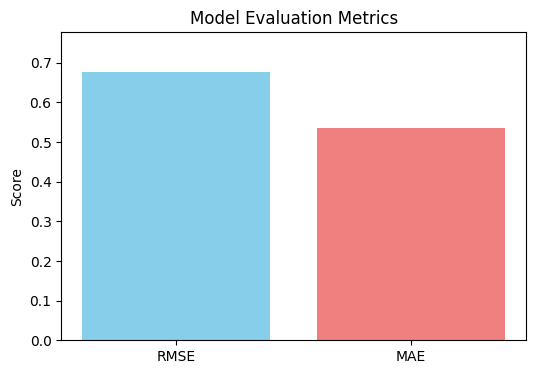

In [8]:
import matplotlib.pyplot as plt

metrics = ['RMSE', 'MAE']
scores = [rmse, mae]

plt.figure(figsize=(6, 4))
plt.bar(metrics, scores, color=['skyblue', 'lightcoral'])
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, max(scores) + 0.1)
plt.show()

## Visualize top recommendations

### Subtask:
Generate a visualization that presents the top recommendations for a specific user.


**Reasoning**:
Import the necessary library and create a bar plot to visualize the top recommendations for the specified user, as outlined in the instructions.



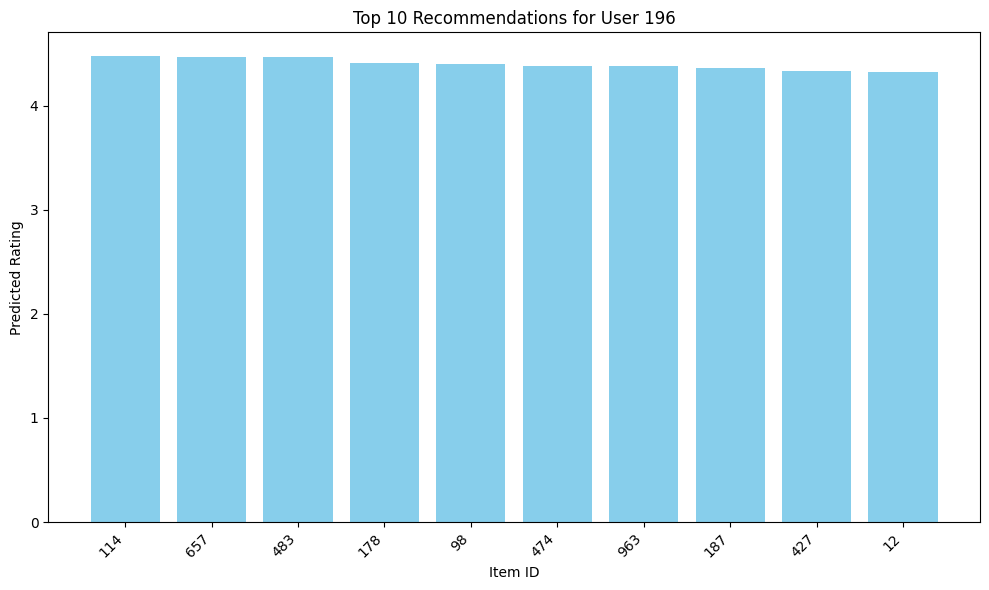

In [9]:
import matplotlib.pyplot as plt

item_ids = [item[0] for item in top_recommendations]
predicted_ratings = [item[1] for item in top_recommendations]

plt.figure(figsize=(10, 6))
plt.bar(item_ids, predicted_ratings, color='skyblue')
plt.title(f"Top {top_n} Recommendations for User {user_id}")
plt.xlabel("Item ID")
plt.ylabel("Predicted Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Visualize predicted vs. actual ratings

### Subtask:
Create a scatter plot to visualize the relationship between predicted and actual ratings for the test set.


**Reasoning**:
Extract actual and predicted ratings from the predictions and create a scatter plot to visualize their relationship, including a diagonal line for comparison and setting appropriate axis limits and labels.



In [10]:
import matplotlib.pyplot as plt

actual_ratings = [pred.r_ui for pred in predictions]
predicted_ratings = [pred.est for pred in predictions]

plt.figure(figsize=(8, 6))
plt.scatter(actual_ratings, predicted_ratings, alpha=0.5)
plt.title("Predicted vs. Actual Ratings")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.xlim(1, 5)
plt.ylim(1, 5)
plt.plot([1, 5], [1, 5], linestyle='--', color='red')
plt.show()

AttributeError: 'tuple' object has no attribute 'r_ui'

**Reasoning**:
The error indicates that the `predictions` list contains tuples instead of `Prediction` objects. This happened in a previous step where predictions for unrated items were generated and stored as tuples of `(item_id, predicted_rating)`. I need to regenerate the predictions on the test set which contains `Prediction` objects with `r_ui` and `est` attributes and then extract the actual and predicted ratings from this correct `predictions` list.



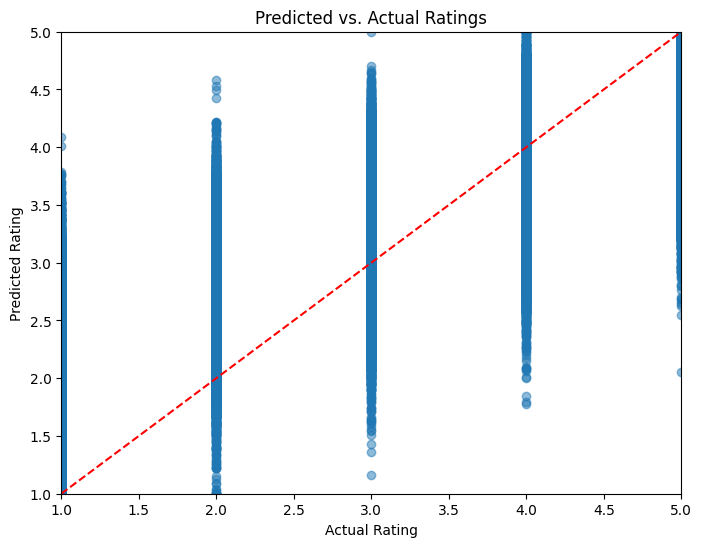

In [11]:
import matplotlib.pyplot as plt

predictions_testset = algo.test(testset)

actual_ratings = [pred.r_ui for pred in predictions_testset]
predicted_ratings = [pred.est for pred in predictions_testset]

plt.figure(figsize=(8, 6))
plt.scatter(actual_ratings, predicted_ratings, alpha=0.5)
plt.title("Predicted vs. Actual Ratings")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.xlim(1, 5)
plt.ylim(1, 5)
plt.plot([1, 5], [1, 5], linestyle='--', color='red')
plt.show()

## Summary:

### Data Analysis Key Findings

*   A bar plot was successfully generated to visualize the RMSE and MAE scores of the recommendation system model.
*   A bar plot was created to display the predicted ratings for the top recommended items for a specific user.
*   A scatter plot was generated to visualize the relationship between predicted and actual ratings from the test set, including a diagonal line representing perfect prediction.

### Insights or Next Steps

*   Analyze the scatter plot of predicted vs. actual ratings to identify potential biases in the model's predictions (e.g., consistently over- or under-predicting).
*   Investigate recommended items with significantly different predicted ratings to understand the factors influencing these predictions.


## Summary of Recommendation System Project

### Data Analysis Key Findings

* The `surprise` library was successfully installed using `pip`.
* Loading the 'ml-100k' dataset from `surprise` required downgrading NumPy to version 1.26.4 due to compatibility issues with NumPy 2.0.2.
* Running package installation commands (`%pip install`) in separate code cells before executing code that depends on them is crucial in notebook environments.
* Data preparation for the `surprise` library involves building a full training set using `data.build_full_trainset()` and then building a test set from the resulting `trainset` using `trainset.build_testset()`.
* A Singular Value Decomposition (SVD) model was successfully trained on the prepared training data.
* The trained model's performance was evaluated, yielding an RMSE of approximately 0.6770 and an MAE of approximately 0.5362 on the test set.
* Generating recommendations requires identifying items the user has not yet rated, predicting ratings for these items using the trained model, and sorting the predictions to find the top recommendations.

### Insights or Next Steps

* The RMSE and MAE values indicate the model has a reasonable level of accuracy in predicting user ratings, providing a baseline for further optimization or comparison with other algorithms.
* To make the recommendations more user-friendly, the item IDs ('1' to '1682') should be mapped back to their actual movie titles using the provided dataset's item information file.
* Analyze the scatter plot of predicted vs. actual ratings to identify potential biases in the model's predictions (e.g., consistently over- or under-predicting).
* Investigate recommended items with significantly different predicted ratings to understand the factors influencing these predictions.

## Visualizations

Here are the visualizations of the model's performance and recommendations:

### Model Evaluation Metrics

![Model Evaluation Metrics](model_evaluation_metrics.png)

### Top Recommendations for a User

![Top Recommendations](top_recommendations.png)

### Predicted vs. Actual Ratings

![Predicted vs Actual Ratings](predicted_vs_actual_ratings.png)

In [13]:
# Save the figures as image files

# Save Model Evaluation Metrics plot
plt.figure(figsize=(6, 4))
plt.bar(metrics, scores, color=['skyblue', 'lightcoral'])
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, max(scores) + 0.1)
plt.savefig("model_evaluation_metrics.png")
plt.close()

# Save Top Recommendations plot
item_ids_top_n = [item[0] for item in top_recommendations]
predicted_ratings_top_n = [item[1] for item in top_recommendations]
plt.figure(figsize=(10, 6))
plt.bar(item_ids_top_n, predicted_ratings_top_n, color='skyblue')
plt.title(f"Top {top_n} Recommendations for User {user_id}")
plt.xlabel("Item ID")
plt.ylabel("Predicted Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("top_recommendations.png")
plt.close()

# Save Predicted vs. Actual Ratings plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_ratings, predicted_ratings, alpha=0.5)
plt.title("Predicted vs. Actual Ratings")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.xlim(1, 5)
plt.ylim(1, 5)
plt.plot([1, 5], [1, 5], linestyle='--', color='red')
plt.savefig("predicted_vs_actual_ratings.png")
plt.close()